In [1]:
#See how changing between amino acids effects RMSD as an average over all positions
import os
from Bio import SeqIO
import sys
sys.path.append('/mnt/ncshare/ozkilim/covid/covid_landscape/SARS2_RBD_Ab_escape_maps')
from bindingcalculator import BindingCalculator
from biopandas.pdb import PandasPdb
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import matplotlib.patches as mpatches

In [6]:
def pos_matrix_creator(PDB_filename):
    """"This function takes in a PDB and ... it returns a symetrix MxM matrix that is rotation and shift independant"""""
    ppdb = PandasPdb()
    data = ppdb.read_pdb(PDB_filename)
    atom_data = ppdb.df['ATOM']    
    mut_removed = atom_data
    position_matrix = mut_removed[["residue_number","x_coord" , "y_coord" , "z_coord"]]
    # aggresgate and take mean of xyz values for each residue as an approximation.
    aggregation_functions = {'x_coord': 'mean', 'y_coord': 'mean', 'z_coord': 'mean'}
    position_matrix = position_matrix.groupby(position_matrix['residue_number']).aggregate(aggregation_functions)  

    return position_matrix 

426
(201, 3)
(201, 3)


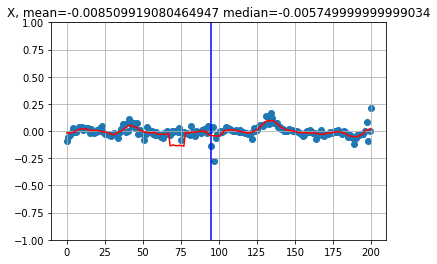

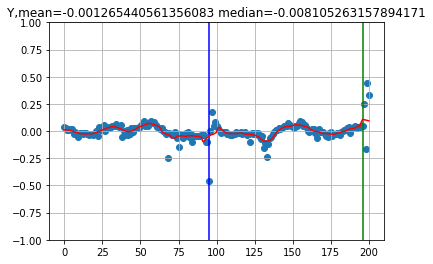

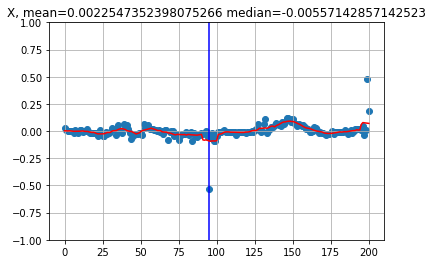

In [16]:
# Plot this as chain position... varies and mean variation in structure. ~40 mins to run.
# loop over all varientants and all pdbs
from scipy.signal import find_peaks

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


base_var_list = ["alpha"] #match to how data is downloaded.

for dir in base_var_list:
    directory = "../structures/" + dir
    df2 = []
    for idx, filename in enumerate(os.listdir(directory)):
        file_path = os.path.join(directory, filename)
        mut_name = file_path[-9:-4]
        start = mut_name[0]
        target = mut_name[-1]
        pos = int(mut_name[1:-1])
        print(pos)
        # create distance matrix.
        d = pos_matrix_creator(file_path)
        pdb_file = "../../covid_exploration/alfafold_mainvariants/pdbs/rot-Alpha_RBD.pdb"
        wuhan_mat = pos_matrix_creator(pdb_file)
        print(wuhan_mat.shape)
        print(d.shape)
        dist = (wuhan_mat-d).to_numpy()


        plt.scatter(range(201),dist[:,0])

        y_av = movingaverage(dist[:,0], 10)
        plt.axvline(x = pos-331, color = 'b', label = 'Mutation Position')

        peaks, _ = find_peaks(y_av, height=0.1)
        for peak in peaks:
            plt.axvline(x = peak, color = 'g', label = 'Mutation Position')


        plt.title("X, mean="+str(np.mean(dist[:,0]))+" median="+str(np.median(dist[:,0])))
        plt.plot(y_av,c="r")
        plt.ylim([-1,1])
        plt.grid()
        plt.show()

        plt.title("Y,mean="+str(np.mean(dist[:,1]))+" median="+str(np.median(dist[:,1])))

        plt.scatter(range(201),dist[:,1])
        y_av = movingaverage(dist[:,1], 10)
        plt.axvline(x = pos-331, color = 'b', label = 'Mutation Position')

        peaks, _ = find_peaks(y_av, height=0.1)
        for peak in peaks:
            plt.axvline(x = peak, color = 'g', label = 'Mutation Position')

        plt.plot(y_av,c="r")
        plt.ylim([-1,1])

        plt.grid()
        plt.show()

        plt.title("X, mean="+str(np.mean(dist[:,2]))+" median="+str(np.median(dist[:,2])))
        plt.axvline(x = pos-331, color = 'b', label = 'Mutation Position')



        plt.scatter(range(201),dist[:,2])
        y_av = movingaverage(dist[:,2], 10)

        peaks, _ = find_peaks(y_av, height=0.1)
        for peak in peaks:
            plt.axvline(x = peak, color = 'g', label = 'Mutation Position')

        plt.plot(y_av,c="r")
        plt.grid()
        plt.ylim([-1,1])

        plt.show()
        # df2.append([pos,dist])
        # print(idx)
        
        break

    # df3 = pd.DataFrame(df2, columns = ['pos','d'])
    # df3.to_csv("./xyz_diff/"+dir+".csv")
    # peaks are corrolated with positions of mutations. Show this in one figure?

426


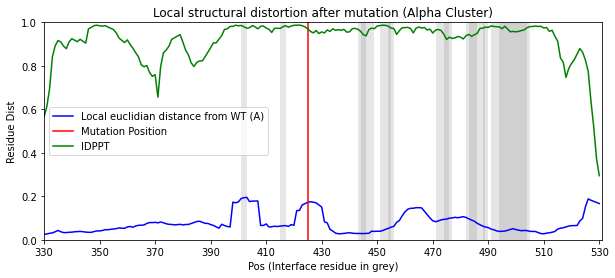

409


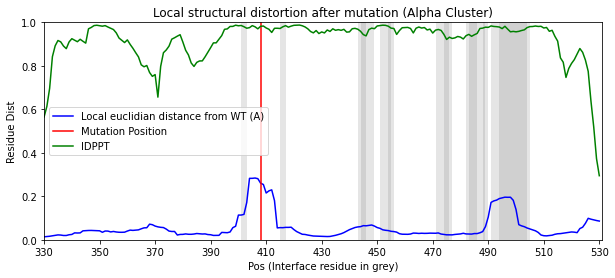

452


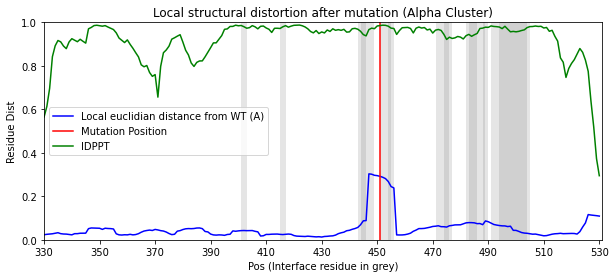

486


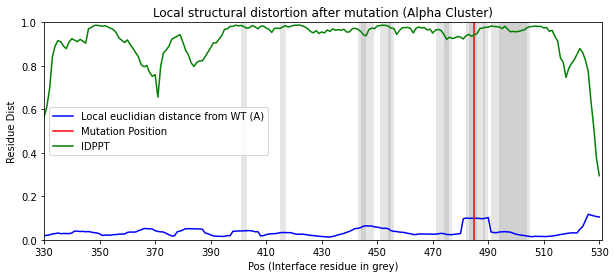

374


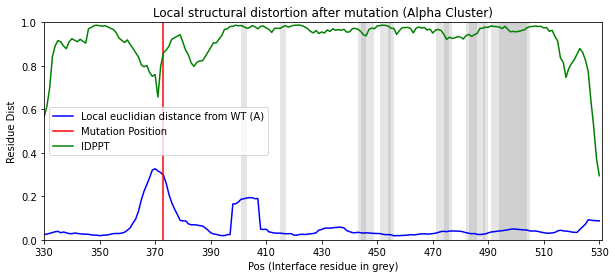

398


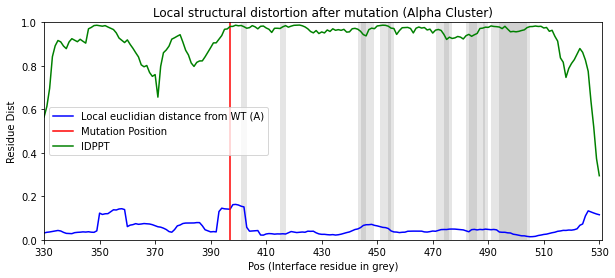

523


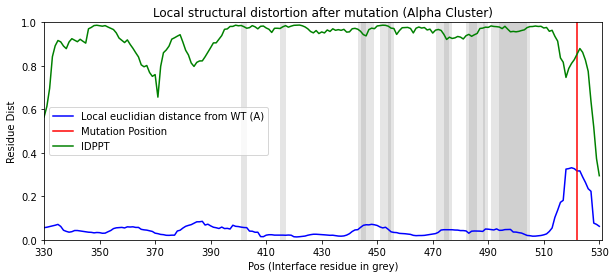

469


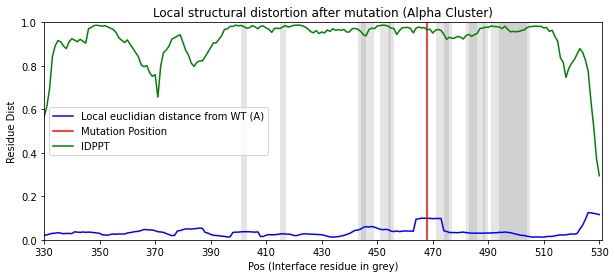

425


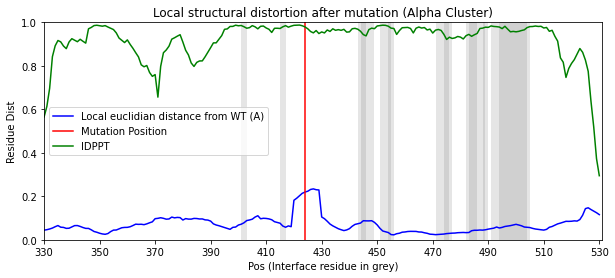

444


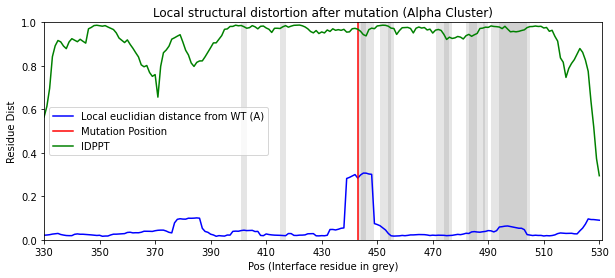

428


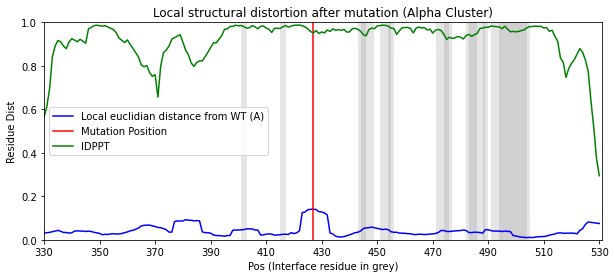

448


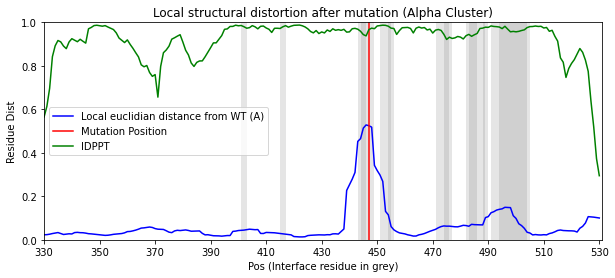

378


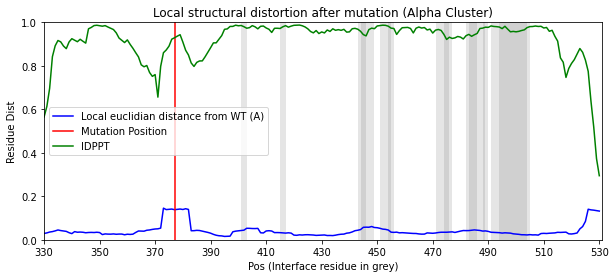

529


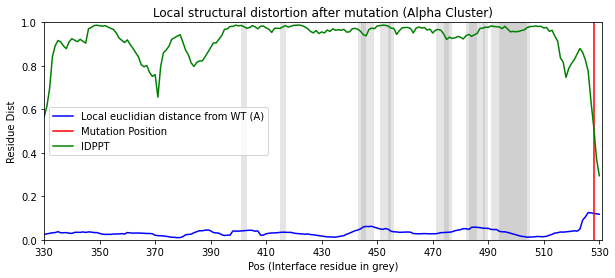

350


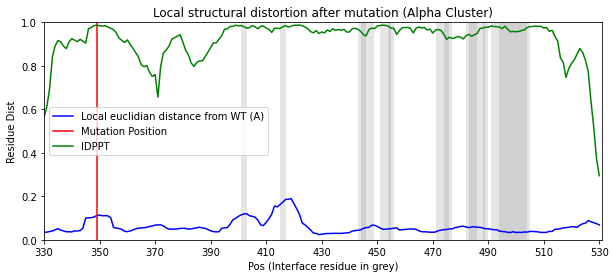

473


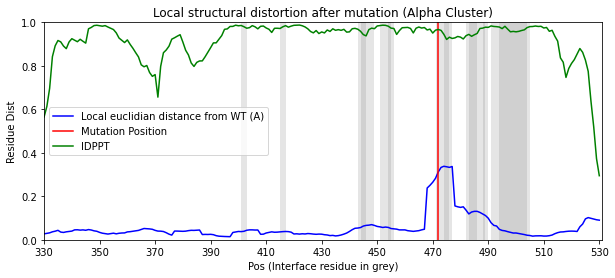

411


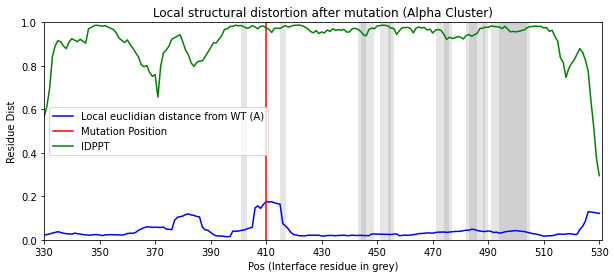

337


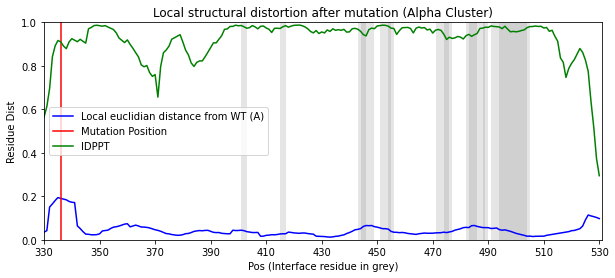

339


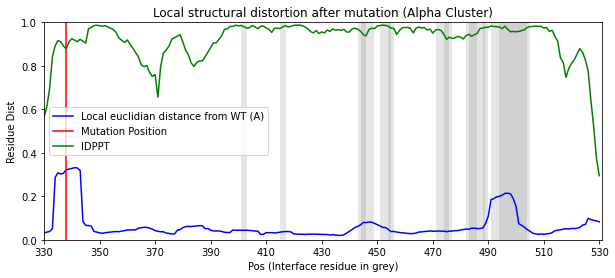

506


KeyboardInterrupt: 

In [36]:
from scipy.signal import find_peaks
from scipy.spatial import distance_matrix

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

interface = np.array([403,417,445,446,447,449,453,455,456,473,475,476,477,484,485,486,487,489,490,493,495,496,497,498,499,500,501,502,503,504,505])
df_bfactor = pd.read_csv("../disorder_analysis/alphatry.csv")

base_var_list = ["alpha"] #match to how data is downloaded.


for dir in base_var_list:
    directory = "../structures/" + dir
    df2 = []
    for idx, filename in enumerate(os.listdir(directory)):
        file_path = os.path.join(directory, filename)
        mut_name = file_path[-9:-4]
        start = mut_name[0]
        target = mut_name[-1]
        pos = int(mut_name[1:-1])
        print(pos)
        # create distance matrix.
        d = pos_matrix_creator(file_path)
        pdb_file = "../../covid_exploration/alfafold_mainvariants/pdbs/rot-Alpha_RBD.pdb"
        wuhan_mat = pos_matrix_creator(pdb_file)
        # print(wuhan_mat)
        dist = (wuhan_mat.to_numpy()-d.to_numpy())

        dist = np.linalg.norm(dist,axis=1)
        # plt.scatter(range(201),dist)
        fig = plt.figure(figsize=(10, 4))

        y_av = movingaverage(dist, 10)
        plt.plot(y_av,c="b",label="Local euclidian distance from WT (A)")

        plt.axvline(x = pos-331, color = 'r', label = 'Mutation Position')
        # plt.axvline(x = 520-331, color = 'orange', label = 'Reference mut Position')

        peaks, _ = find_peaks(y_av, height=0.5)
        # for peak in peaks:
        #     plt.axvline(x = peak, color = 'g', label = 'Mutation Position')
        plt.ylabel("Residue Dist")
        # plot interface residues.. 
        for inter in interface:
            plt.bar(inter-331,1,color='grey',alpha=0.2,width=2)
        # then if bump is in interface so if it corrolates with phenotype  

        plt.title("Local structural distortion after mutation (Alpha Cluster)")
        plt.xlabel("Pos (Interface residue in grey)")
        plt.xticks(range(0,201,20),range(330,531,20)) #incorect labels..

        # plot parts of axes that are less confident... 
        plt.plot(range(201),df_bfactor["b_factor"]/100,alpha=1,color="green",label="lDPPT")

        plt.legend()
        plt.ylim([0,1])
        plt.xlim([0,201])
        # plt.grid()
        plt.show()
        fig.savefig("../reasults_figs/local_dist/disorder_" + str(idx) +"position.png",bbox_inches='tight',facecolor="white")
        break

In [7]:
# Mut position vs local distortion positions matrix.. 


from scipy.signal import find_peaks
from scipy.spatial import distance_matrix

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

interface = np.array([403,417,445,446,447,449,453,455,456,473,475,476,477,484,485,486,487,489,490,493,495,496,497,498,499,500,501,502,503,504,505])
df_bfactor = pd.read_csv("../disorder_analysis/alphatry.csv")

base_var_list = ["alpha"] #match to how data is downloaded.

interaction_mat = []
for dir in base_var_list:
    directory = "../structures/" + dir
    df2 = []
    for idx, filename in enumerate(os.listdir(directory)):
        try:

            file_path = os.path.join(directory, filename)
            mut_name = file_path[-9:-4]
            start = mut_name[0]
            target = mut_name[-1]
            pos = int(mut_name[1:-1])
            print(pos)
            # create distance matrix.
            d = pos_matrix_creator(file_path)
            pdb_file = "../../covid_exploration/alfafold_mainvariants/pdbs/rot-Alpha_RBD.pdb"
            wuhan_mat = pos_matrix_creator(pdb_file)
            dist = (wuhan_mat.to_numpy()-d.to_numpy())
            dist = np.linalg.norm(dist,axis=1)
            y_av = movingaverage(dist, 10)

            interaction_mat.append([pos,y_av])

        except:
            pass
     
np.save("interaction_mat_alpha.npy",np.array(interaction_mat))

426
409
452
486
374
398
523
469
425
444
428
448
378
529
350
473
411
337
339
506
354
466
382
389
497
417
453
375
457
465
383
510
371
504
455
492
403
397
496
377
507
463
338
356
394
505
490
527
493
508
500
518
423
365
391
443
429
501
504
400
364
403
331
492
478
468
496
397
377
388
491
333
463
362
342
507
356
531
527
505
508
423
443
365
391
387
429
426
376
409
418
486
430
467
425
523
444
411
473
350
506
339
466
349
354
497
382
375
453
445
450
522
457
357
383
465
341
371
364
400
413
478
403
496
397
481
468
338
388
491
480
332
394
531
356
490
384
500
423
493
429
501
348
365
387
443
370
376
452
430
398
374
428
444
346
425
350
378
349
466
337
476
506
453
458
445
375
417
357
447
522
450
435
405
510
383
370
376
398
374
430
452
418
428
346
523
448
354
349
476
337
339
445
458
417
497
382
447
357
407
457
510
400
474
364
478
413
492
455
468
481
342
463
507
480
388
531
394
490
384
518
500
493
501
387
391
413
478
400
474
491
388
342
338
397
496
384
490
527
531
394
332
443
429
348
501
493
508
518
500


<ipython-input-7-d9c0599b6b0a>:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save("interaction_mat_alpha.npy",np.array(interaction_mat))


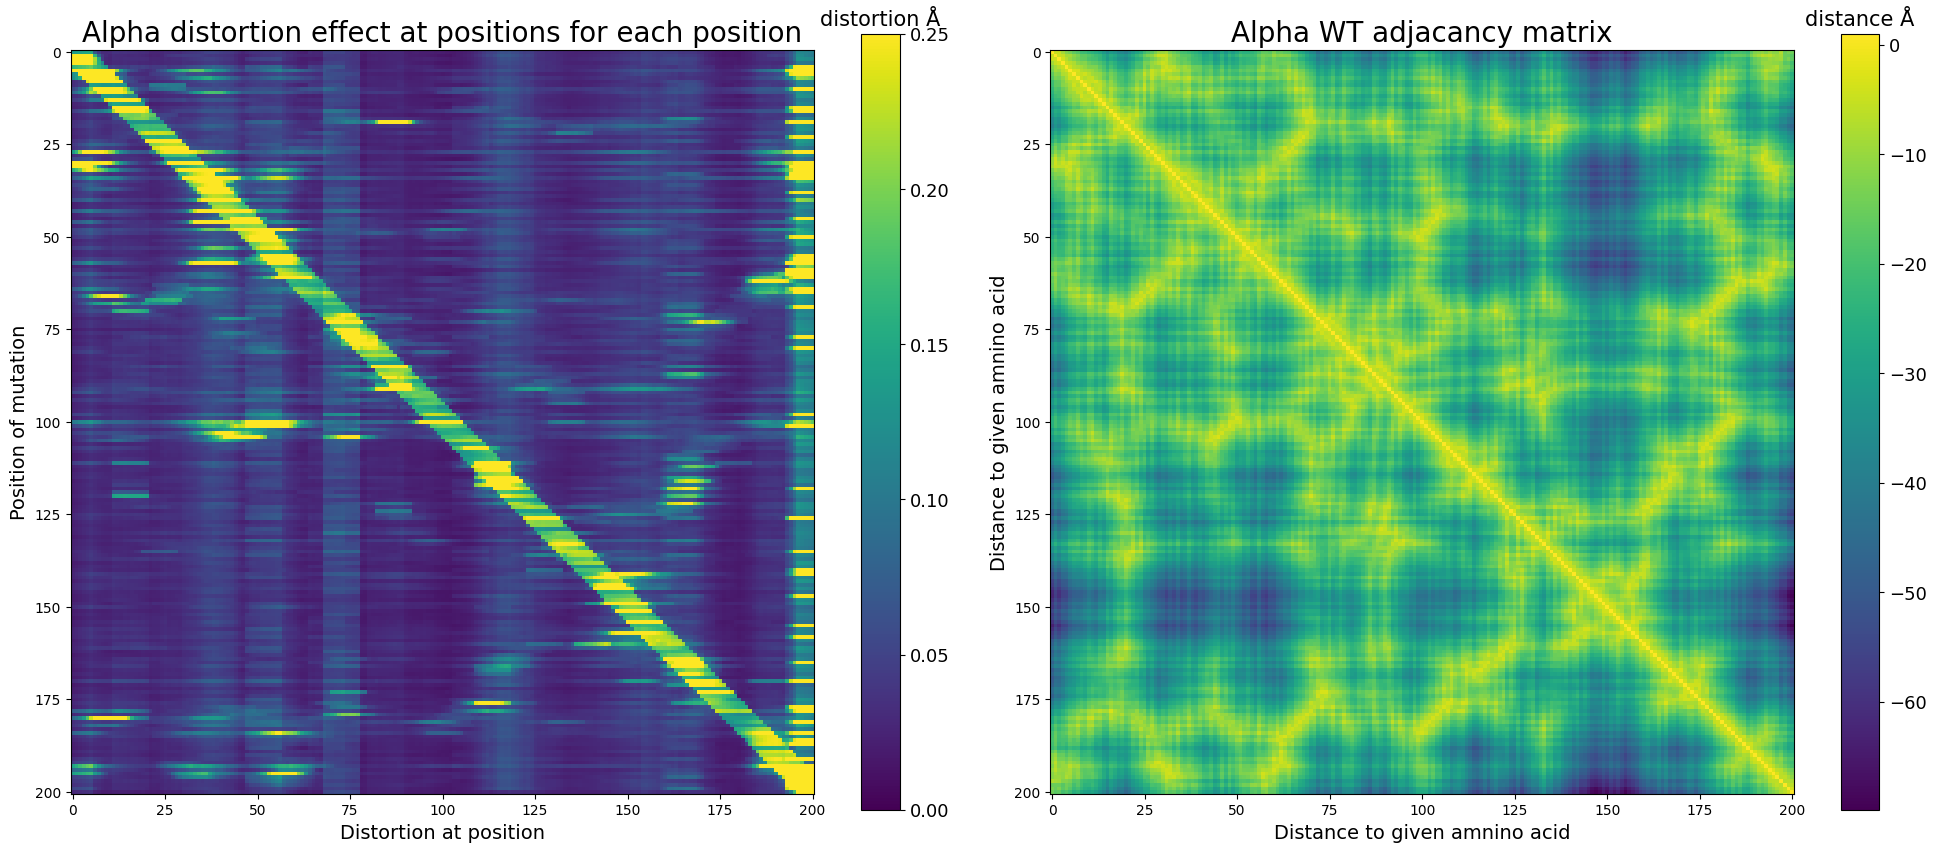

In [15]:
import seaborn as sn

interaction_mat = np.load("interaction_mat_alpha.npy",allow_pickle=True)
df1 = pd.DataFrame(interaction_mat,columns =["pos","effect"])
df2 = pd.DataFrame(df1["effect"].to_list())
df1 = df1.groupby(['pos']).mean().unstack(fill_value=0) #did it mean values inside lists?... 
df1 = pd.DataFrame(df1["effect"].to_list())
df1 = df1.to_numpy()

f, axes = plt.subplots(1, 2,figsize=(20, 10), dpi=100)

colors = axes[0].imshow(df1,vmin=0, vmax=0.25)
axes[0].set_title('Alpha distortion effect at positions for each position',fontsize=20)
axes[0].set_ylabel('Position of mutation',fontsize=14)
axes[0].set_xlabel('Distortion at position',fontsize=14)
clb = plt.colorbar(colors,ax=axes[0],shrink=0.80)
clb.ax.tick_params(labelsize=13) 
clb.ax.set_title('distortion Å',fontsize=15)

af2_adg = np.load("/mnt/ncshare/ozkilim/covid/data_release_paper/wuhan_generalization_experements/embeddings/alpha_adj_mat_encoding.npy")
af2_adg = af2_adg[0,:-2]
af2_adg = af2_adg.reshape((201, 201))

colors = axes[1].imshow(1-af2_adg)
axes[1].set_title('Alpha WT adjacancy matrix',fontsize=20)
axes[1].set_ylabel('Distance to given amnino acid',fontsize=14)
axes[1].set_xlabel('Distance to given amnino acid',fontsize=14)

# axes[1].set_aspect(10)


clb = plt.colorbar(colors,ax=axes[1],shrink=0.80)
clb.ax.tick_params(labelsize=13) 
clb.ax.set_title('distance Å',fontsize=15)

plt.tight_layout()
plt.show()
f.savefig("../reasults_figs/local_distortion_positions.png",bbox_inches='tight',facecolor="white")
